## Integrantes do Grupo:
- Arthur Wanderley Ferreira dos Santos - awfs@cesar.school
- Thiago Wanderley Amorim - twa@cesar.school

## Dataset Escolhido:
https://www.kaggle.com/datasets/juniorbueno/neural-networks-homer-and-bart-classification/data

## Leitura do dataset

In [350]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision
from torchvision import transforms

import os
from PIL import Image

In [351]:
!git clone https://github.com/arthurwanderley/RNA-e-Deep-Learning---CESAR-School-2024.01.git

fatal: destination path 'RNA-e-Deep-Learning---CESAR-School-2024.01' already exists and is not an empty directory.


In [352]:
image_dir = "RNA-e-Deep-Learning---CESAR-School-2024.01/Trabalho Final/homer_bart_1"

image_files = [f for f in os.listdir(image_dir) if f.endswith('bmp')]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [353]:

images = []
labels = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    tensor_img = transform(img)
    images.append(tensor_img)

    if "homer" in img_file.lower():
        labels.append(0)  # Classe 0 para Homer
    elif "bart" in img_file.lower():
        labels.append(1)  # Classe 1 para Bart

In [354]:

images = torch.stack(images)
labels = torch.tensor(labels)


print("Amostras do dataset:", images.size(0))
print("\nDimensões dos dados das imagens:   ", images.size())
print("Valores mínimo e máximo dos pixels:", torch.min(images), torch.max(images))
print("Tipo dos dados das imagens:        ", type(images))
print("Tipo das classes das imagens:      ", type(labels))

Amostras do dataset: 269

Dimensões dos dados das imagens:    torch.Size([269, 3, 224, 224])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


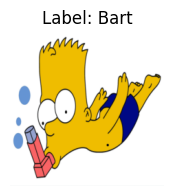

In [355]:
plt.figure(figsize=(2, 2))
plt.imshow(images[0].permute(1, 2, 0))
plt.title(f"Label: {'Homer' if labels[0] == 0 else 'Bart'}")
plt.axis('off')
plt.show()

In [356]:
from torch.utils.data import random_split
from torch.utils.data import TensorDataset

dataset = TensorDataset(images, labels)

total_size = len(images)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

x_train = torch.stack([x for x, _ in train_dataset])
y_train = torch.tensor([y for _, y in train_dataset])
x_test = torch.stack([x for x, _ in test_dataset])
y_test = torch.tensor([y for _, y in test_dataset])


print("Amostras de treinamento:", len(train_dataset))
print("Amostras de teste:", len(test_dataset))
print("\nDimensões dos dados de treinamento:", x_train.size())
print("Dimensões dos dados de teste:", x_test.size())
print("\nValores mínimo e máximo dos pixels (treino):", torch.min(x_train), torch.max(x_train))
print("Valores mínimo e máximo dos pixels (teste):", torch.min(x_test), torch.max(x_test))

Amostras de treinamento: 215
Amostras de teste: 54

Dimensões dos dados de treinamento: torch.Size([215, 3, 224, 224])
Dimensões dos dados de teste: torch.Size([54, 3, 224, 224])

Valores mínimo e máximo dos pixels (treino): tensor(0.) tensor(1.)
Valores mínimo e máximo dos pixels (teste): tensor(0.) tensor(1.)


## Definição do Modelo da Rede

In [357]:
from torch import nn
import torch.nn.functional as F

class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(3 * 224 * 224, 512)
        self.linear2 = nn.Linear(512, 128)
        self.linear3 = nn.Linear(128, 32)
        self.linear4 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return F.log_softmax(x, dim=1)

In [358]:
from torch import optim

In [359]:
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(x_train, y_train),
    batch_size=32,
    shuffle=True
)

In [360]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f'Epoch {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

In [364]:
n_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LinearNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(1, n_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)

Epoch 1 [0/215] Loss: 0.737243
Epoch 2 [0/215] Loss: 0.834350
Epoch 3 [0/215] Loss: 0.833898
Epoch 4 [0/215] Loss: 0.771104
Epoch 5 [0/215] Loss: 0.692480
Epoch 6 [0/215] Loss: 0.614773
Epoch 7 [0/215] Loss: 0.689438
Epoch 8 [0/215] Loss: 0.632022
Epoch 9 [0/215] Loss: 0.689774
Epoch 10 [0/215] Loss: 0.529282
Epoch 11 [0/215] Loss: 0.576738
Epoch 12 [0/215] Loss: 0.644943
Epoch 13 [0/215] Loss: 0.599209
Epoch 14 [0/215] Loss: 0.602690
Epoch 15 [0/215] Loss: 0.882078
Epoch 16 [0/215] Loss: 0.417848
Epoch 17 [0/215] Loss: 0.494043
Epoch 18 [0/215] Loss: 0.392825
Epoch 19 [0/215] Loss: 0.408641
Epoch 20 [0/215] Loss: 0.468524
Epoch 21 [0/215] Loss: 0.391783
Epoch 22 [0/215] Loss: 0.595945
Epoch 23 [0/215] Loss: 0.329952
Epoch 24 [0/215] Loss: 0.574209
Epoch 25 [0/215] Loss: 0.331838
Epoch 26 [0/215] Loss: 0.434565
Epoch 27 [0/215] Loss: 0.325031
Epoch 28 [0/215] Loss: 0.420987
Epoch 29 [0/215] Loss: 0.267355
Epoch 30 [0/215] Loss: 0.250598
Epoch 31 [0/215] Loss: 0.389832
Epoch 32 [0/215] 

In [365]:
def test(model, device, test_loader):
   model.eval()
   test_loss = 0
   correct = 0
   with torch.no_grad():
       for data, target in test_loader:
           data, target = data.to(device), target.to(device)
           output = model(data)
           test_loss += F.nll_loss(output, target, reduction='sum').item()
           pred = output.argmax(dim=1, keepdim=True)
           correct += pred.eq(target.view_as(pred)).sum().item()

   test_loss /= len(test_loader.dataset)
   print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
       test_loss, correct, len(test_loader.dataset),
       100. * correct / len(test_loader.dataset)))

test_loader = torch.utils.data.DataLoader(
   torch.utils.data.TensorDataset(x_test, y_test),
   batch_size=32
)


test(model, device, test_loader)


Test set: Average loss: 0.4598, Accuracy: 43/54 (80%)



No desenvolvimento desta atividade, pudemos entender como criar uma rede neural aplicada a classificação binária entre duas categorias. Pudemos também entender as implicações das mudanças dos parametros da rede.

Inicialmente, setamos um valor de learning de 0.01, e percebemos que, durante as épocas, a função de perda não apresentava convergência, indicando que o valor pudesse estar muito alto. Após isso, diminuímos o valor para 0.001, e notamos que durante as épocas, a função de perda passou a diminuir, mas em um ritmo lento. Nesse momento, o modelo já apresentava uma acurácia melhor (74%) do que com o learning rate de 0.01 (66%). Decidimos então aumentar o número de épocas para 100, mas percebemos que a função de perda diminuía até a época aproximada de 80, e então aumentava novamente, indicando um possível overfitting (a acurácia do modelo também diminui de 74% para 68%). Decidimos então voltar para 50 épocas e diminuir ainda mais o learning rate para 0.001%.

Além disso, testamos também alterações no número de parametros da rede, mas não afetou de maneira significativa.